In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.feature_selection import RFE,RFECV

In [8]:
#KNN imputed missing values - credit Justin Gerolami
df_train_knn = pd.read_csv('Imputed_Train.csv')

### Dataset Info

In [9]:
print("Shape: ",df_train_knn.shape)
# number of null values in each column, 0 
# print(df_train_knn.isnull().sum(axis = 0))
df_train_knn.describe()

Shape:  (504, 120)


,Year,Robbery_rate,Property_crime_rate,Burglary_rate,Larceny_theft_rate,Motor_vehicle_theft_rate,Population,Total law_enforcement_employees,Law_enforcement_Total officers emloyee,Total civilians employee,...,Percent of houdsehold with children under 18; AGE OF OWN CHILDREN - Under 6 years and 6 to 17 years,Percent of houdsehold with children under 18; AGE OF OWN CHILDREN - 6 to 17 years only,Civilian employed population 16 years and over - Government workers,Civilian employed population 16 years and over - Private wage and salary workers,Civilian employed population 16 years and over - Self-employed workers in own not incorporated business,Civilian employed population 16 years and over - Unpaid family workers,percentage_ Total: - 1-person household:,percentage_ Total: - 2-person household:,percentage_ Total: - 3-person household:,percentage_ Total: - 4-or-more-person household:
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02,504.000000,504.000000,504.000000,...,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,1.515873,174.216865,3794.012174,859.891468,2545.005574,390.622619,1.964265e+05,446.662698,349.773810,96.878968,...,20.927778,54.890873,13.840482,80.191571,5.842824,0.126098,28.858723,30.869111,15.987119,24.285046
std,0.500245,145.068378,1520.936903,491.452388,1016.150549,292.667286,3.523808e+05,1256.162456,1066.217627,226.800135,...,5.193399,6.559045,5.164315,5.679446,2.288553,0.156353,7.645760,4.480280,2.753192,8.536256
min,1.000000,0.000000,210.700000,51.400000,149.000000,6.200000,1.341900e+04,1.000000,1.000000,0.000000,...,6.100000,32.500000,4.800000,51.000000,1.900000,0.000000,10.404093,13.980969,8.260291,8.067218
25%,1.000000,63.900000,2623.800000,489.000000,1761.225000,165.550000,7.941050e+04,122.750000,86.000000,27.000000,...,17.675000,50.600000,10.400000,77.200000,4.300000,0.000000,23.295118,27.948767,14.095336,18.248628
50%,2.000000,138.050000,3509.250000,756.150000,2362.150000,301.750000,1.012360e+05,201.000000,148.500000,49.500000,...,20.900000,54.700000,12.700000,81.100000,5.500000,0.100000,29.420723,31.217555,15.835624,22.398415
75%,2.000000,228.300000,4813.275000,1112.550000,3211.225000,536.600000,1.816388e+05,356.250000,271.250000,95.500000,...,24.400000,59.000000,16.500000,84.025000,6.900000,0.200000,34.348578,33.636465,17.740791,28.786602
max,2.000000,739.500000,8730.100000,2773.800000,5958.500000,1777.000000,3.855122e+06,13960.000000,13088.000000,3215.000000,...,40.300000,74.300000,40.200000,93.100000,15.200000,1.300000,52.762473,45.230130,24.790949,56.302475


### Splitting Year = 1 and Year = 2 into two datasets

In [10]:
df_train_one = df_train_knn[df_train_knn["Year"]==1]
print("Shape: ",df_train_one.shape)
df_train_two = df_train_knn[df_train_knn["Year"]==2]
print("Shape: ",df_train_two.shape)

Shape:  (244, 120)
Shape:  (260, 120)


#### Year 1 Crime Rates and Year 2 Crime Rates

In [11]:
def boxplot(x_data, y_data, base_color="#539caf", median_color="#297083", x_label="", y_label="", title=""):
    _, ax = plt.subplots()

    # Draw boxplots, specifying desired style
    ax.boxplot(y_data
               # patch_artist must be True to control box fill
               , patch_artist = True
               # Properties of median line
               , medianprops = {'color': median_color}
               # Properties of box
               , boxprops = {'color': base_color, 'facecolor': base_color}
               # Properties of whiskers
               , whiskerprops = {'color': base_color}
               # Properties of whisker caps
               , capprops = {'color': base_color})
    

    # By default, the tick label starts at 1 and increments by 1 for
    # each box drawn. This sets the labels to the ones we want
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data[0], y_data[0], lw = 2, color = '#539caf', alpha = 1)
    ax.plot(x_data[1], y_data[1], lw = 2, color = 'r', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

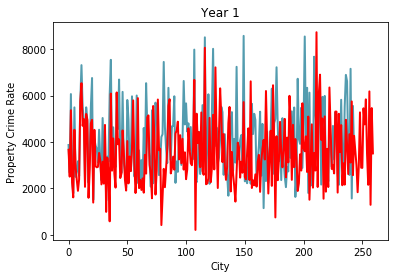

In [12]:
lineplot([range(df_train_one.shape[0]),range(df_train_two.shape[0])],[df_train_one["Property_crime_rate"],df_train_two["Property_crime_rate"]],"City","Property Crime Rate","Year 1")
# xdata = ['Robbery_rate', 'Property_crime_rate', 'Burglary_rate','Larceny_theft_rate', 'Motor_vehicle_theft_rate']
# boxplot(xdata,df_train_one[['Robbery_rate', 'Property_crime_rate', 'Burglary_rate','Larceny_theft_rate', 'Motor_vehicle_theft_rate']])

In [22]:
without_labels = df_train_knn.drop(columns=['Robbery_rate', 'Property_crime_rate', 'Burglary_rate','Larceny_theft_rate', 'Motor_vehicle_theft_rate','City'])
#scaler = #StandardScaler()
scaler = MinMaxScaler()
X = scaler.fit_transform(without_labels)



ALL FEATURES WITH BASELINE SVM 
Number of bins,  2

Property Crime
             precision    recall  f1-score   support

          1       0.77      0.67      0.71       252
          2       0.71      0.80      0.75       252

avg / total       0.74      0.73      0.73       504

Accuracy:  0.7341269841269841
[[168  50]
 [ 84 202]]
[ 210.7  3509.25 8730.1 ]

Burglary
             precision    recall  f1-score   support

          1       0.80      0.69      0.74       252
          2       0.73      0.82      0.77       252

avg / total       0.76      0.76      0.76       504

Accuracy:  0.7579365079365079
[[175  45]
 [ 77 207]]
[  51.4   756.15 2773.8 ]

Larceny Theft
             precision    recall  f1-score   support

          1       0.74      0.65      0.69       252
          2       0.69      0.77      0.73       252

avg / total       0.71      0.71      0.71       504

Accuracy:  0.7103174603174603
[[164  58]
 [ 88 194]]
[ 149.   2362.15 5958.5 ]

Motor Vehicle
         

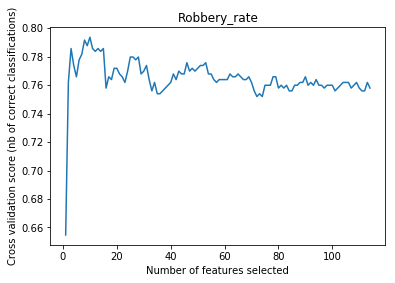

[2, 4, 11, 48, 52, 53, 54, 76, 80, 96]
['Total law_enforcement_employees', 'Total civilians employee', 'Percent; SEX AND AGE - 20 to 24 years', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $200,000 or more', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Mean family income (dollars)', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)', 'Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All families', 'Percent; HOUSING TENURE - Owner-occupied', 'Percent; VEHICLES AVAILABLE - 2 vehicles available', 'Percent RACE  - Black or African American']
Optimal number of features : 31


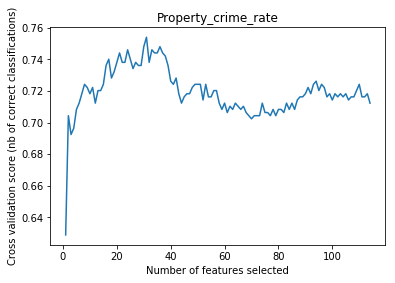

[8, 11, 12, 18, 19, 21, 22, 25, 28, 31, 49, 50, 57, 58, 60, 62, 63, 65, 71, 75, 76, 80, 84, 86, 90, 95, 97, 100, 108, 112, 113]
['Percent; SEX AND AGE - 5 to 9 years', 'Percent; SEX AND AGE - 20 to 24 years', 'Percent; SEX AND AGE - 25 to 34 years', 'Percent; SEX AND AGE - 75 to 84 years', 'Percent; SEX AND AGE - 85 years and over', 'Percent; EMPLOYMENT STATUS - In labor force', 'Percent; OCCUPATION - Management, business, science, and arts occupations', 'Percent; OCCUPATION - Production, transportation, and material moving occupations', 'Percent; INDUSTRY - Manufacturing', 'Percent; INDUSTRY - Transportation and warehousing, and utilities', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - With Social Security', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - With retirement income', "Percent of age group 18 to 24 with Some college or associate's degree", "Percent of age group 18 to 24 with Bachelor's degree or higher", 'Percent of age group abo

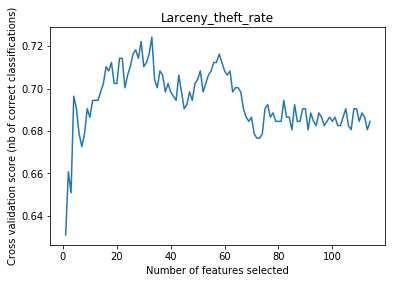

[8, 10, 11, 14, 19, 20, 22, 25, 28, 36, 38, 45, 47, 50, 52, 53, 57, 58, 60, 63, 71, 77, 79, 80, 81, 93, 94, 95, 99, 102, 108, 110, 111]
['Percent; SEX AND AGE - 5 to 9 years', 'Percent; SEX AND AGE - 15 to 19 years', 'Percent; SEX AND AGE - 20 to 24 years', 'Percent; SEX AND AGE - 45 to 54 years', 'Percent; SEX AND AGE - 85 years and over', 'Estimate; SEX AND AGE - Median age (years)', 'Percent; OCCUPATION - Management, business, science, and arts occupations', 'Percent; OCCUPATION - Production, transportation, and material moving occupations', 'Percent; INDUSTRY - Manufacturing', 'Percent; INDUSTRY - Arts, entertainment, and recreation, and accommodation and food services', 'Percent; INDUSTRY - Public administration', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $75,000 to $99,999', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $150,000 to $199,999', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - With retirement inco

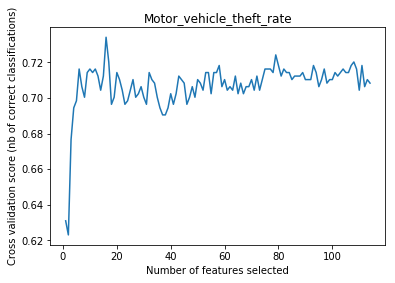

[1, 2, 3, 4, 11, 31, 38, 48, 60, 64, 69, 73, 78, 89, 98, 107]
['Population', 'Total law_enforcement_employees', 'Law_enforcement_Total officers emloyee', 'Total civilians employee', 'Percent; SEX AND AGE - 20 to 24 years', 'Percent; INDUSTRY - Transportation and warehousing, and utilities', 'Percent; INDUSTRY - Public administration', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $200,000 or more', 'Percent of age group above 25 yrs with 9th to 12th grade, no diploma', "Percent of age group above 25 yrs with Bachelor's degree", 'Percent; UNITS IN STRUCTURE - Mobile home', 'Percent; BEDROOMS - 3 bedrooms', 'Percent; VEHICLES AVAILABLE - No vehicles available', 'Now married (except separated); Percent of Population 15 years and over', 'Percent RACE  - Asian', 'Civilian employed population 16 years and over - Private wage and salary workers']
Optimal number of features : 19


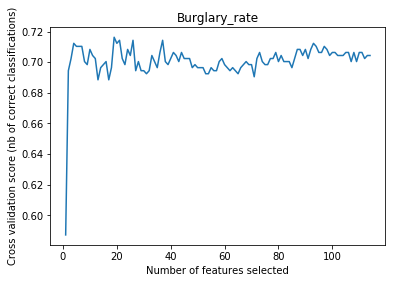

[8, 9, 10, 24, 28, 35, 48, 50, 58, 60, 62, 66, 71, 75, 95, 96, 97, 100, 110]
['Percent; SEX AND AGE - 5 to 9 years', 'Percent; SEX AND AGE - 10 to 14 years', 'Percent; SEX AND AGE - 15 to 19 years', 'Percent; OCCUPATION - Sales and office occupations', 'Percent; INDUSTRY - Manufacturing', 'Percent; INDUSTRY - Educational services, and health care and social assistance', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $200,000 or more', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - With retirement income', "Percent of age group 18 to 24 with Bachelor's degree or higher", 'Percent of age group above 25 yrs with 9th to 12th grade, no diploma', 'Percent of age group above 25 yrs with Some college, no degree', 'Percent; HOUSING OCCUPANCY - Occupied housing units', 'Percent; BEDROOMS - 1 bedroom', 'Percent; BEDROOMS - 5 or more bedrooms', 'Percent RACE  - White', 'Percent RACE  - Black or African American', 'Percent RACE  - American Indian and Alas

             precision    recall  f1-score   support

          1       0.65      0.54      0.59       168
          2       0.41      0.47      0.44       168
          3       0.61      0.62      0.61       168

avg / total       0.56      0.54      0.55       504

Accuracy:  0.5436507936507936
[[ 91  39  11]
 [ 60  79  53]
 [ 17  50 104]]
[ 210.7        2903.73333333 4381.2        8730.1       ]

Burglary
             precision    recall  f1-score   support

          1       0.71      0.62      0.66       168
          2       0.40      0.55      0.47       168
          3       0.62      0.47      0.54       168

avg / total       0.58      0.55      0.55       504

Accuracy:  0.5476190476190477
[[104  36   7]
 [ 55  93  82]
 [  9  39  79]]
[  51.4         567.36666667  959.66666667 2773.8       ]

Larceny Theft
             precision    recall  f1-score   support

          1       0.62      0.62      0.62       168
          2       0.42      0.27      0.33       168
          3

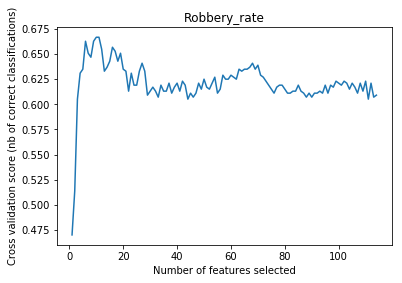

[1, 2, 4, 48, 51, 52, 65, 75, 78, 80, 96]
['Population', 'Total law_enforcement_employees', 'Total civilians employee', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $200,000 or more', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Median family income (dollars)', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Mean family income (dollars)', 'Percent of age group above 25 yrs with Graduate or professional degree', 'Percent; BEDROOMS - 5 or more bedrooms', 'Percent; VEHICLES AVAILABLE - No vehicles available', 'Percent; VEHICLES AVAILABLE - 2 vehicles available', 'Percent RACE  - Black or African American']
Optimal number of features : 16


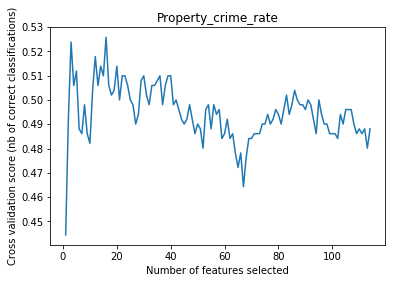

[1, 2, 4, 23, 32, 39, 51, 52, 53, 58, 60, 69, 71, 75, 100, 110]
['Population', 'Total law_enforcement_employees', 'Total civilians employee', 'Percent; OCCUPATION - Service occupations', 'Percent; INDUSTRY - Information', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Less than $10,000', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Median family income (dollars)', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Mean family income (dollars)', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)', "Percent of age group 18 to 24 with Bachelor's degree or higher", 'Percent of age group above 25 yrs with 9th to 12th grade, no diploma', 'Percent; UNITS IN STRUCTURE - Mobile home', 'Percent; BEDROOMS - 1 bedroom', 'Percent; BEDROOMS - 5 or more bedrooms', 'Percent RACE  - Some other race', 'percentage_ Total: - 1-person household:']
Optimal number of features : 21


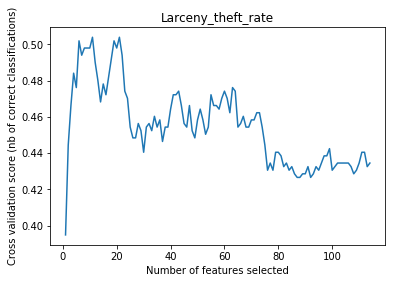

[1, 4, 9, 11, 15, 19, 20, 22, 47, 48, 50, 51, 52, 58, 61, 64, 71, 79, 81, 90, 113]
['Population', 'Total civilians employee', 'Percent; SEX AND AGE - 10 to 14 years', 'Percent; SEX AND AGE - 20 to 24 years', 'Percent; SEX AND AGE - 55 to 59 years', 'Percent; SEX AND AGE - 85 years and over', 'Estimate; SEX AND AGE - Median age (years)', 'Percent; OCCUPATION - Management, business, science, and arts occupations', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $150,000 to $199,999', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $200,000 or more', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - With retirement income', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Median family income (dollars)', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Mean family income (dollars)', "Percent of age group 18 to 24 with Bachelor's degree or higher", 'Percent of age group above 25 yrs with 

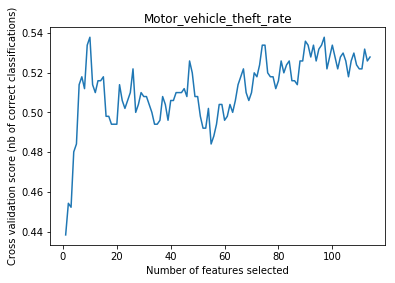

[0, 1, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 78, 80, 81, 82, 83, 84, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 102, 105, 107, 108, 110, 113]
['Year', 'Population', 'Total law_enforcement_employees', 'Law_enforcement_Total officers emloyee', 'Total civilians employee', 'Percent; SEX AND AGE - Female', 'Percent; SEX AND AGE - Under 5 years', 'Percent; SEX AND AGE - 5 to 9 years', 'Percent; SEX AND AGE - 15 to 19 years', 'Percent; SEX AND AGE - 20 to 24 years', 'Percent; SEX AND AGE - 25 to 34 years', 'Percent; SEX AND AGE - 35 to 44 years', 'Percent; SEX AND AGE - 45 to 54 years', 'Percent; SEX AND AGE - 55 to 59 years', 'Percent; SEX AND AGE - 60 to 64 years', 'Percent; SEX AND AGE - 65 to 74 years', 'Percent; SEX AND AGE - 85 years and over',

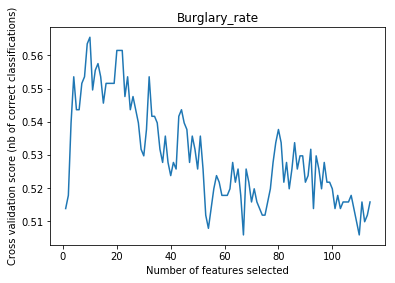

[3, 4, 17, 22, 47, 49, 51, 52, 64, 110]
['Law_enforcement_Total officers emloyee', 'Total civilians employee', 'Percent; SEX AND AGE - 65 to 74 years', 'Percent; OCCUPATION - Management, business, science, and arts occupations', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $150,000 to $199,999', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - With Social Security', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Median family income (dollars)', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Mean family income (dollars)', "Percent of age group above 25 yrs with Bachelor's degree", 'percentage_ Total: - 1-person household:']
GRID SEARCH BINS=  3
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.327 (+/-0.005) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.327 (+/-0.005) for {'C': 1,

             precision    recall  f1-score   support

          1       0.64      0.39      0.49       126
          2       0.33      0.37      0.35       126
          3       0.31      0.46      0.37       126
          4       0.53      0.44      0.48       126

avg / total       0.46      0.41      0.42       504

Accuracy:  0.4146825396825397
[[49 23  3  1]
 [49 46 27 16]
 [22 52 58 53]
 [ 6  5 38 56]]
[ 210.7   2623.8   3509.25  4813.275 8730.1  ]

Burglary
             precision    recall  f1-score   support

          1       0.61      0.56      0.59       126
          2       0.37      0.17      0.24       126
          3       0.34      0.62      0.44       126
          4       0.60      0.48      0.54       126

avg / total       0.48      0.46      0.45       504

Accuracy:  0.4603174603174603
[[71 34 11  0]
 [23 22 10  4]
 [27 62 78 61]
 [ 5  8 27 61]]
[  51.4   489.    756.15 1112.55 2773.8 ]

Larceny Theft
             precision    recall  f1-score   support

        

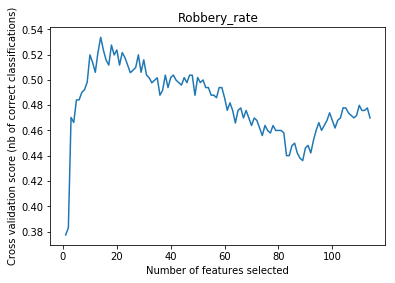

[1, 2, 4, 19, 48, 49, 52, 53, 64, 65, 75, 78, 80, 96]
['Population', 'Total law_enforcement_employees', 'Total civilians employee', 'Percent; SEX AND AGE - 85 years and over', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $200,000 or more', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - With Social Security', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Mean family income (dollars)', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)', "Percent of age group above 25 yrs with Bachelor's degree", 'Percent of age group above 25 yrs with Graduate or professional degree', 'Percent; BEDROOMS - 5 or more bedrooms', 'Percent; VEHICLES AVAILABLE - No vehicles available', 'Percent; VEHICLES AVAILABLE - 2 vehicles available', 'Percent RACE  - Black or African American']
Optimal number of features : 8


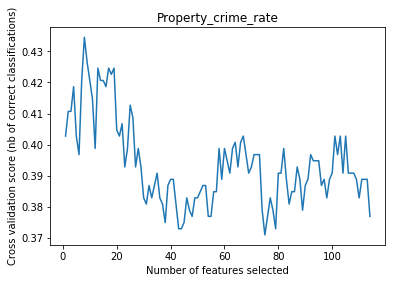

[3, 4, 22, 48, 51, 52, 64, 113]
['Law_enforcement_Total officers emloyee', 'Total civilians employee', 'Percent; OCCUPATION - Management, business, science, and arts occupations', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $200,000 or more', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Median family income (dollars)', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Mean family income (dollars)', "Percent of age group above 25 yrs with Bachelor's degree", 'percentage_ Total: - 4-or-more-person household:']
Optimal number of features : 19


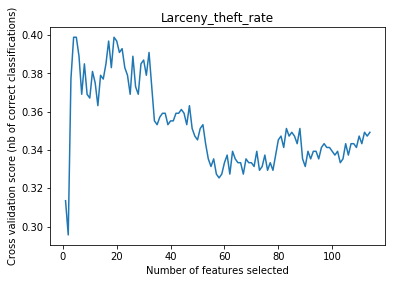

[1, 3, 4, 10, 11, 20, 23, 34, 39, 47, 48, 51, 53, 58, 78, 80, 102, 106, 110]
['Population', 'Law_enforcement_Total officers emloyee', 'Total civilians employee', 'Percent; SEX AND AGE - 15 to 19 years', 'Percent; SEX AND AGE - 20 to 24 years', 'Estimate; SEX AND AGE - Median age (years)', 'Percent; OCCUPATION - Service occupations', 'Percent; INDUSTRY - Professional, scientific, and management, and administrative and waste management services', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Less than $10,000', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $150,000 to $199,999', 'Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $200,000 or more', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Median family income (dollars)', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Per capita income (dollars)', "Percent of age group 18 to 24 with Bachelor's degree or higher", 'Percent; VEH

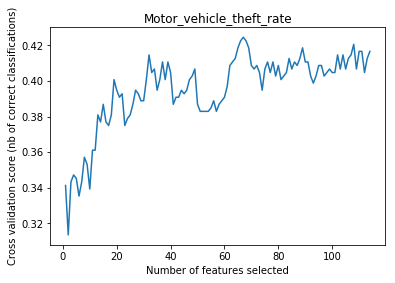

[1, 2, 3, 4, 7, 8, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 28, 29, 30, 35, 38, 39, 40, 41, 43, 44, 45, 47, 48, 49, 51, 52, 53, 54, 60, 61, 64, 65, 66, 68, 69, 70, 71, 73, 74, 75, 79, 80, 81, 89, 90, 93, 94, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 110, 113]
['Population', 'Total law_enforcement_employees', 'Law_enforcement_Total officers emloyee', 'Total civilians employee', 'Percent; SEX AND AGE - Under 5 years', 'Percent; SEX AND AGE - 5 to 9 years', 'Percent; SEX AND AGE - 20 to 24 years', 'Percent; SEX AND AGE - 45 to 54 years', 'Percent; SEX AND AGE - 55 to 59 years', 'Percent; SEX AND AGE - 60 to 64 years', 'Percent; SEX AND AGE - 65 to 74 years', 'Percent; SEX AND AGE - 75 to 84 years', 'Percent; SEX AND AGE - 85 years and over', 'Estimate; SEX AND AGE - Median age (years)', 'Percent; EMPLOYMENT STATUS - In labor force', 'Percent; OCCUPATION - Management, business, science, and arts occupations', 'Percent; OCCUPATION - Production, transportation, and material movin

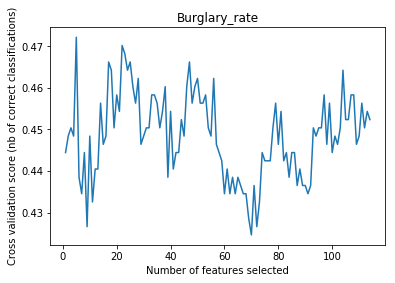

[47, 51, 52, 89, 93]
['Percent; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - $150,000 to $199,999', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Median family income (dollars)', 'Estimate; INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS) - Mean family income (dollars)', 'Now married (except separated); Percent of Population 15 years and over', 'Never married; Percent of Population 15 years and over']
GRID SEARCH BINS=  4
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

Grid scores on development set:

0.273 (+/-0.037) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.273 (+/-0.037) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.273 (+/-0.037) for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.273 (+/-0.037) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.270 (+/-0.043) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.270 (+/-0.043) for {'C': 10, 'gamma': 1e-05, 'kernel': 

In [82]:
for i in range(2,5):
    bins = i
    prec = 3
    print("\n\nALL FEATURES WITH BASELINE SVM ")
    model = SVC(kernel="rbf", C=1)
    
    print("Number of bins, ", i)
    crime_labels = range(1,bins+1)
    y = pd.DataFrame()
    print('\nProperty Crime')
    y["Property_crime_rate"], containers = pd.qcut(df_train_knn["Property_crime_rate"], bins, labels=crime_labels, retbins=True, precision=prec, duplicates='raise')
    y_pred = cross_val_predict(model, X, y['Property_crime_rate'], cv=5)
    print(metrics.classification_report(y[ 'Property_crime_rate'], y_pred))
    print("Accuracy: ", metrics.accuracy_score(y_pred,y["Property_crime_rate"]))
    print(metrics.confusion_matrix(y_pred,y["Property_crime_rate"]))
    print(containers)
    
    print('\nBurglary')
    y['Burglary_rate'], containers = pd.qcut(df_train_knn['Burglary_rate'], bins, labels=crime_labels, retbins=True, precision=prec, duplicates='raise')
    y_pred = cross_val_predict(model, X, y['Burglary_rate'], cv=5)
    print(metrics.classification_report(y['Burglary_rate'], y_pred))
    print("Accuracy: ", metrics.accuracy_score(y_pred,y["Burglary_rate"]))
    print(metrics.confusion_matrix(y_pred,y["Burglary_rate"]))
    print(containers)
    
    print('\nLarceny Theft')
    y['Larceny_theft_rate'], containers = pd.qcut(df_train_knn['Larceny_theft_rate'], bins, labels=crime_labels, retbins=True, precision=prec, duplicates='raise')
    y_pred = cross_val_predict(model, X, y['Larceny_theft_rate'], cv=5)
    print(metrics.classification_report(y['Larceny_theft_rate'], y_pred))
    print("Accuracy: ", metrics.accuracy_score(y_pred,y["Larceny_theft_rate"]))
    print(metrics.confusion_matrix(y_pred,y["Larceny_theft_rate"]))
    print(containers)
    
    print('\nMotor Vehicle')
    y['Motor_vehicle_theft_rate'],containers = pd.qcut(df_train_knn['Motor_vehicle_theft_rate'], bins, labels=crime_labels, retbins=True, precision=prec, duplicates='raise')
    y_pred = cross_val_predict(model, X, y['Motor_vehicle_theft_rate'], cv=5)
    print(metrics.classification_report(y['Motor_vehicle_theft_rate'], y_pred))
    print("Accuracy: ", metrics.accuracy_score(y_pred,y["Motor_vehicle_theft_rate"]))
    print(metrics.confusion_matrix(y_pred,y["Motor_vehicle_theft_rate"]))
    print(containers)
    
    print('Robbery')
    y['Robbery_rate'], containers = pd.qcut(df_train_knn['Robbery_rate'], bins, labels=crime_labels, retbins=True, precision=prec, duplicates='raise')
    y_pred = cross_val_predict(model, X, y['Robbery_rate'], cv=5)
    print(metrics.classification_report(y["Robbery_rate"], y_pred))
    print("Accuracy: ", metrics.accuracy_score(y_pred,y["Robbery_rate"]))
    print(metrics.confusion_matrix(y_pred,y["Robbery_rate"]))
    print(containers)
    
    print("FEATURE SELECTION BINS= ",i)

    X_rfe_robbery, columns_robbery = feature_selection(X,y['Robbery_rate'],'Robbery_rate',without_labels.columns)
    X_rfe_property, columns_property = feature_selection(X,y['Property_crime_rate'],'Property_crime_rate',without_labels.columns)
    X_rfe_larceny, columns_larceny = feature_selection(X,y['Larceny_theft_rate'],'Larceny_theft_rate',without_labels.columns)
    X_rfe_motor, columns_motor = feature_selection(X,y['Motor_vehicle_theft_rate'],'Motor_vehicle_theft_rate',without_labels.columns)
    X_rfe_burglary, columns_burglary = feature_selection(X,y['Burglary_rate'],'Burglary_rate',without_labels.columns)

    print("GRID SEARCH BINS= ",i )
    params_robbery = grid_search_crime(y['Robbery_rate'], 'Robbery_rate', X_rfe_robbery,columns_robbery)
    params_property = grid_search_crime(y['Property_crime_rate'], 'Property_crime_rate', X_rfe_property, columns_property)
    params_larceny = grid_search_crime(y['Larceny_theft_rate'], 'Larceny_theft_rate', X_rfe_larceny,columns_larceny)
    params_motor = grid_search_crime(y['Motor_vehicle_theft_rate'], 'Motor_vehicle_theft_rate', X_rfe_motor,columns_motor)
    params_burglary = grid_search_crime(y['Burglary_rate'], 'Burglary_rate', X_rfe_burglary, columns_burglary)


#### Param Grid Search

In [80]:
def grid_search_crime(y, y_label, X, columns):# Split the dataset in two equal parts

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Set the parameters by cross-validation
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4,1e-5],
                         'C': [1, 10, 100, 1000]},
                        {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
                     #  {'kernel': ['poly'], 'C': [1, 10, 100, 1000], 'degree':[2,3,4]}]

    scores =['accuracy']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(SVC(class_weight='balanced',decision_function_shape ='ovo'), tuned_parameters, cv=5,
                           scoring=score)#'%s_macro' % score)
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
       
        y_true, y_pred = y_test, clf.predict(X_test)
        print("Accuracy: ",round(metrics.accuracy_score(y_true,y_pred),2))
        print(metrics.classification_report(y_true, y_pred))
        print(metrics.confusion_matrix(y_true,y_pred))
        print()

    #plot_coefficients(model,columns)
    return clf.best_params_
        

### Recursive Feature Selection

In [81]:
def feature_selection(X,y,yname,cols):
    model = LinearSVC( C=10)
    rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(3),
                  scoring='accuracy')
    rfecv.fit(X, y)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (nb of correct classifications)")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.title(yname)
    plt.show()
    selected = [i for i,x in enumerate(rfecv.ranking_) if x == 1]
    print(selected)
    
    features = X[:,selected]
    
    feature_names = selected_columns(cols, selected)
    print(feature_names)

    #model.fit(X,y)
    #plot_coefficients(model, cols, top_features=20)
    
    return features, selected

In [69]:
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    #print("Top positive: ",top_positive_coefficients)
    top_negative_coefficients = np.argsort(coef)[:top_features]
    #print("Top negative: ",top_negative_coefficients)
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    
def selected_columns(cols, indicies):
    return [x for i, x in enumerate(list(cols)) if i in indicies]

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
X_temp = np.concatenate((X, X_new), axis=1)
